## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data=pd.read_csv('vgsales.csv')
all_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning up data

In [3]:
all_data.isna().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
all_data=all_data.drop(columns=['Rank'])
all_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
all_data.dropna(inplace=True)
all_data.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Analysis

In [6]:
all_data.sort_values('Global_Sales',ascending=False)
# Already sorted according to global sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16183,Sakura-Sou no Pet na Kanojo,PSP,2013.0,Adventure,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
16184,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007.0,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
16185,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
16186,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


### Top 20 Global Sales according to Name

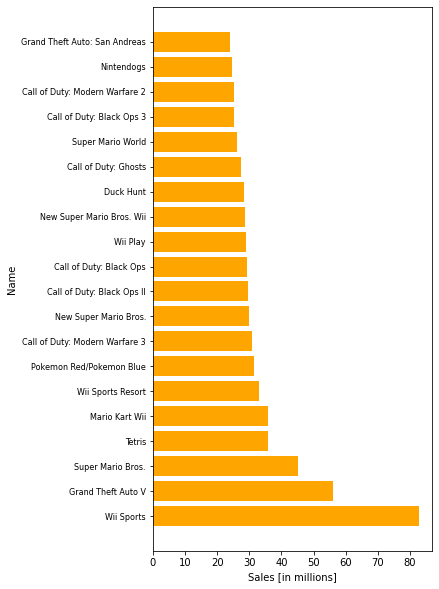

In [7]:
y=all_data.groupby("Name").Global_Sales.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(5,10))
plt.barh(y.index,y.values,color='orange')
plt.yticks(y.index,size=8)
plt.xlabel('Sales [in millions]')
plt.ylabel('Name')
plt.show()

### Global Sales according to Platform

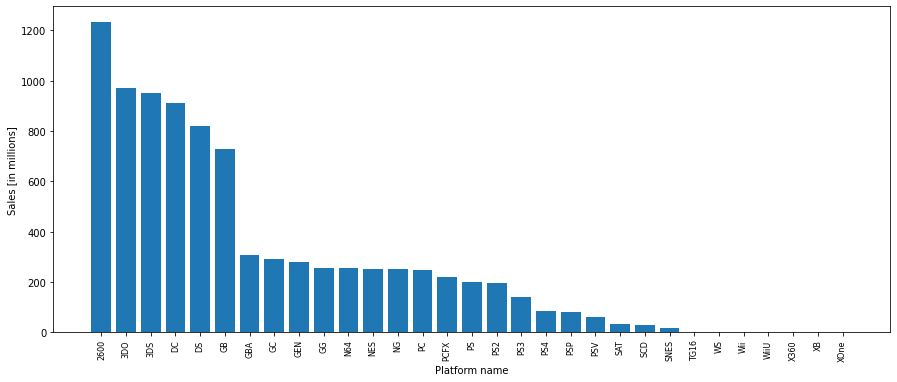

In [8]:
y=all_data.groupby("Platform").sum()
platform=[pf for pf,df in all_data.groupby('Platform')]
plt.figure(figsize=(15,6))
plt.bar(platform,y['Global_Sales'].sort_values(ascending=False))
plt.xticks(platform,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Platform name')
plt.show()

### Top 20 Global Sales according to Publisher

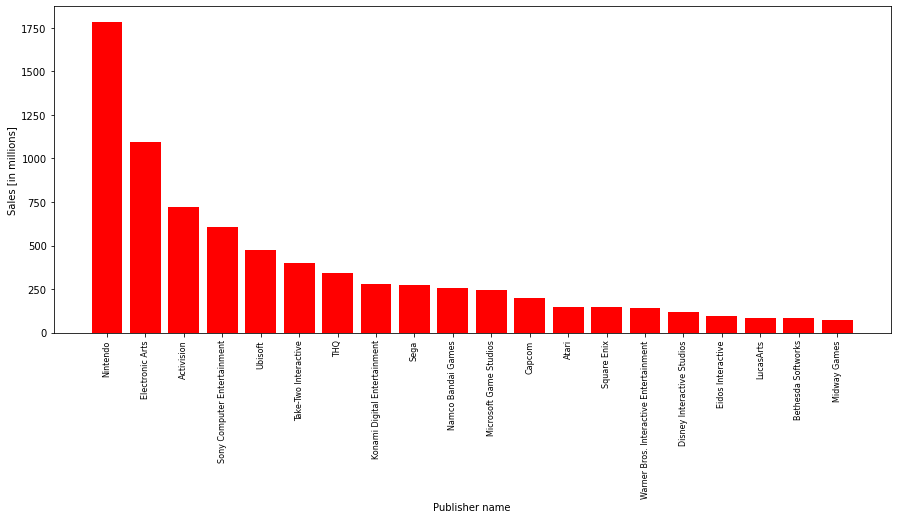

In [9]:
y=all_data.groupby("Publisher").Global_Sales.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='red')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Publisher name')
plt.show()

### Global Sales according to genre

In [10]:
all_data.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

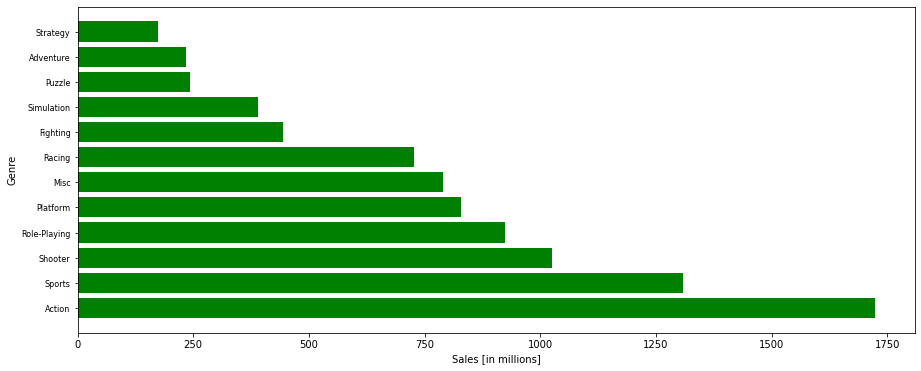

In [11]:
y=all_data.groupby("Genre").Global_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.barh(y.index,y.values,color='green')
plt.yticks(y.index,size=8)
plt.xlabel('Sales [in millions]')
plt.ylabel('Genre')
plt.show()

### Global Sales according to Year 

In [12]:
all_data.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

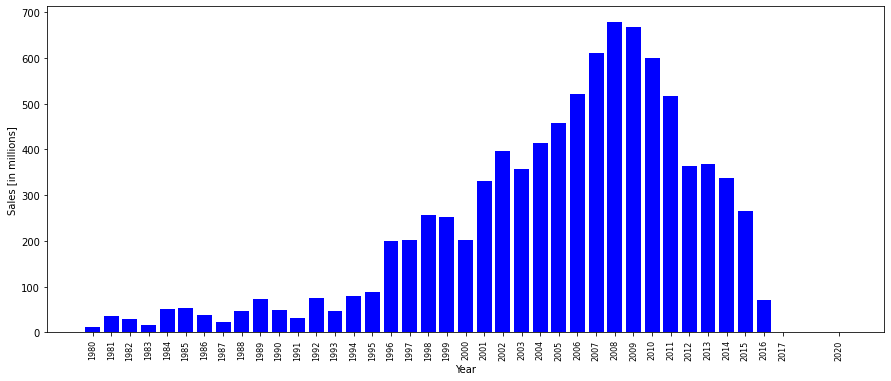

In [13]:

y=all_data.groupby("Year").Global_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='blue')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Year')
plt.show()

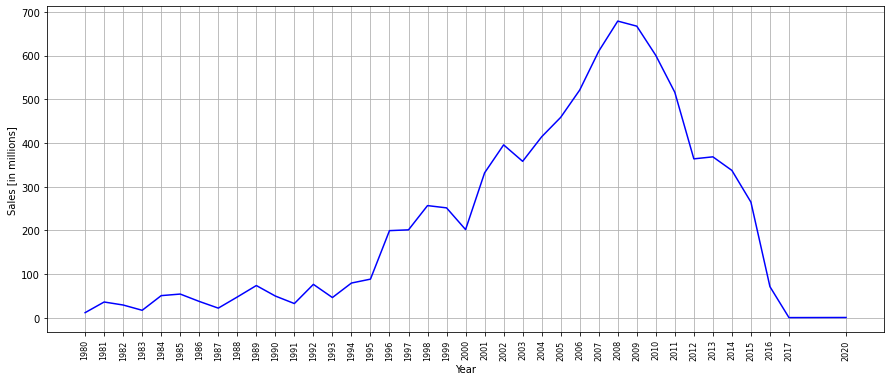

In [14]:
y=all_data.groupby("Year").Global_Sales.sum()
plt.figure(figsize=(15,6))
plt.plot(y.index,y.values,color='blue')
plt.grid()
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Year')
plt.show()

### Genre of games sold in a particular Year

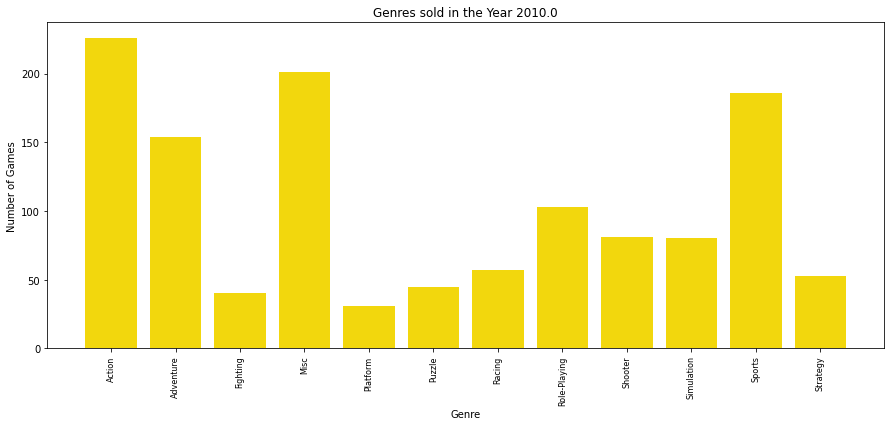

Genre
Action          226
Adventure       154
Fighting         40
Misc            201
Platform         31
Puzzle           45
Racing           57
Role-Playing    103
Shooter          81
Simulation       80
Sports          186
Strategy         53
Name: Name, dtype: int64


In [15]:
year=float(input("Enter year of data required : "))
x=all_data.groupby(['Year','Genre']).count()
x=x.loc[year].Name
plt.figure(figsize=(15,6))
plt.bar(x.index,x.values,color='#f2d70d')
plt.title("Genres sold in the Year "+str(year))
plt.xticks(x.index,rotation='vertical',size=8)
plt.ylabel('Number of Games')
plt.xlabel('Genre')
plt.show()
print(x)

### Platforms with maximum games

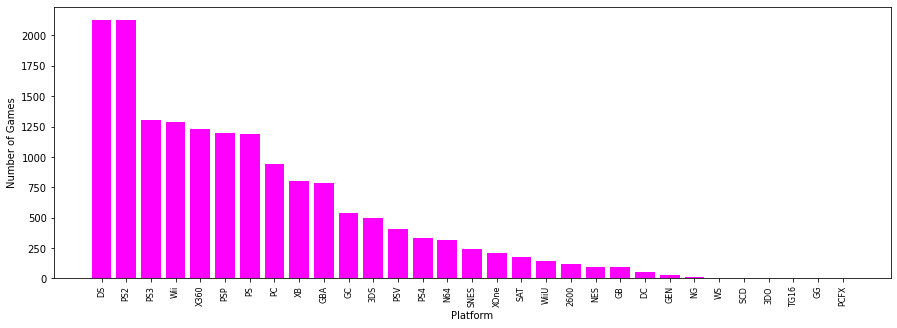

In [16]:
x=all_data.Platform.value_counts()
plt.figure(figsize=(15,5))
plt.bar(x.index,x.values,color='magenta')
plt.xticks(x.index,rotation='vertical',size=8)
plt.ylabel('Number of Games')
plt.xlabel('Platform')
plt.show()

### Year with maximum new games

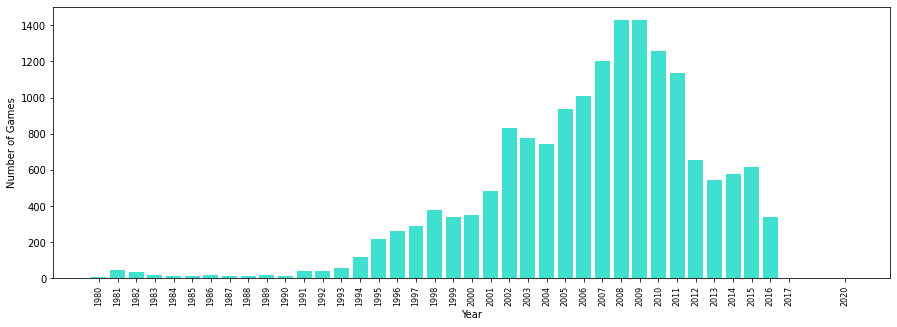

In [17]:
x=all_data.Year.value_counts()
plt.figure(figsize=(15,5))
plt.bar(x.index,x.values,color='turquoise')
plt.xticks(x.index,rotation='vertical',size=8)
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

### Genres with maximum games

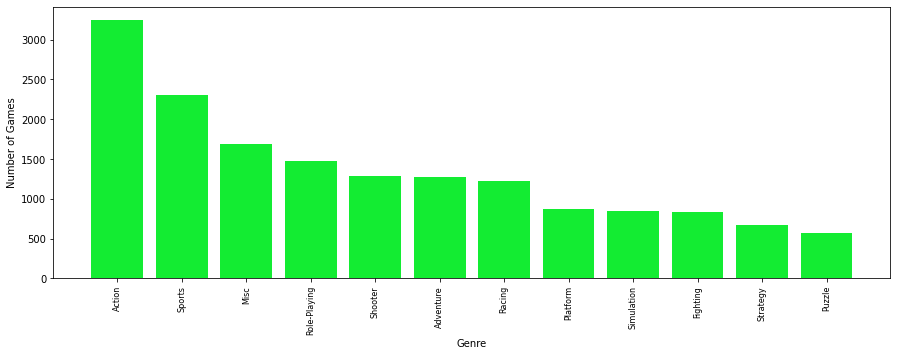

In [18]:
x=all_data.Genre.value_counts()
plt.figure(figsize=(15,5))
plt.bar(x.index,x.values,color='#13ec32')
plt.xticks(x.index,rotation='vertical',size=8)
plt.ylabel('Number of Games')
plt.xlabel('Genre')
plt.show()


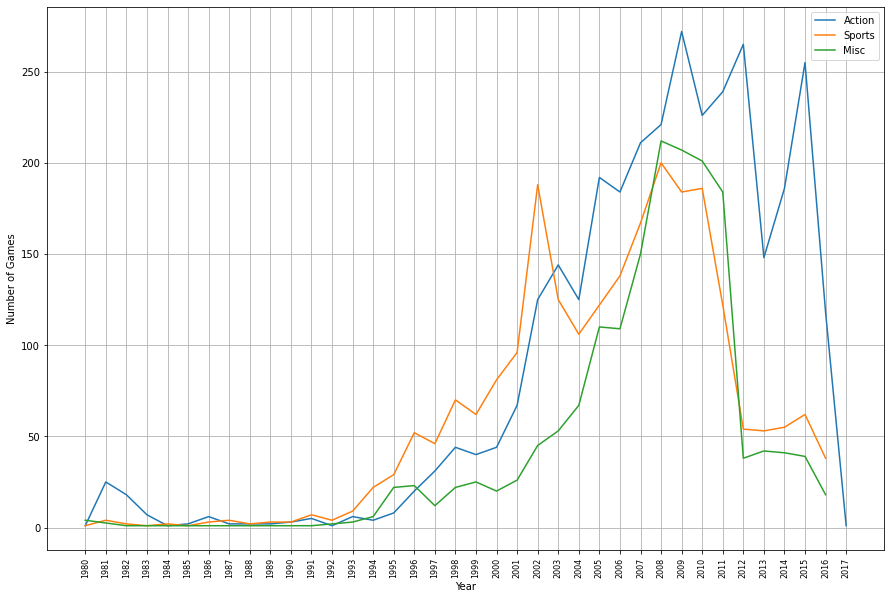

In [19]:
#Variation of action,sports,misc over the years
x=all_data.groupby(['Genre','Year']).Global_Sales.count()
a=x.loc['Action']
s=x.loc['Sports']
m=x.loc['Misc']
plt.figure(figsize=(15,10))
plt.grid()
plt.xticks(a.index,rotation='vertical',size=8)
plt.plot(a.index,a.values,label='Action')
plt.plot(s.index,s.values,label='Sports')
plt.plot(m.index,m.values,label='Misc')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.legend()
plt.show()

### Publisher with maximum games [Top 20]

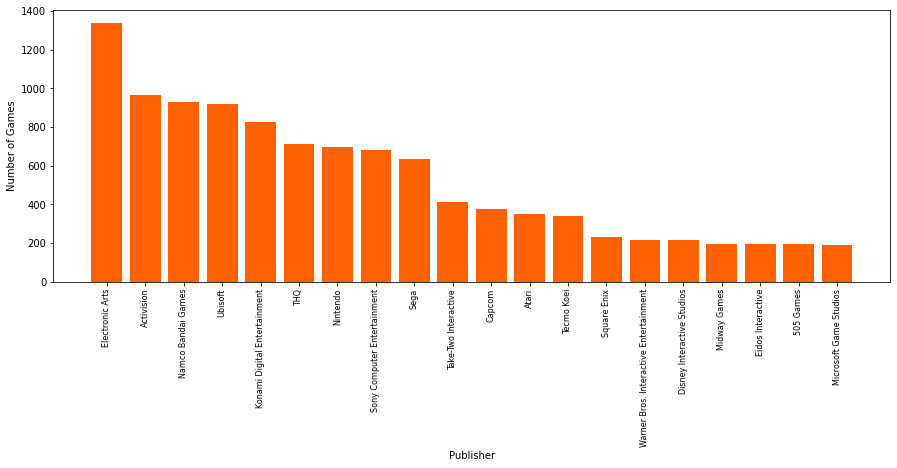

In [20]:
x=all_data.Publisher.value_counts().head(20)
plt.figure(figsize=(15,5))
plt.bar(x.index,x.values,color='#ff6000')
plt.xticks(x.index,rotation='vertical',size=8)
plt.ylabel('Number of Games')
plt.xlabel('Publisher')
plt.show()

### NA vs Japan vs EU vs Other Sales by the year

Text(0.5, 0, 'Year')

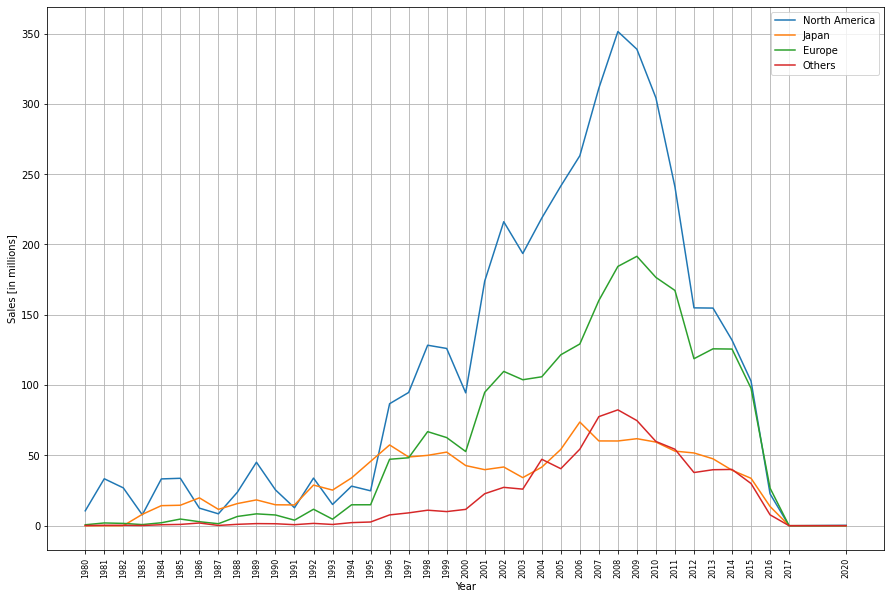

In [21]:
n=all_data.groupby('Year').NA_Sales.sum()
j=all_data.groupby('Year').JP_Sales.sum()
e=all_data.groupby('Year').EU_Sales.sum()
o=all_data.groupby('Year').Other_Sales.sum()
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(n.index,n.values,label='North America')
plt.plot(j.index,j.values,label='Japan')
plt.plot(e.index,e.values,label='Europe')
plt.plot(o.index,o.values,label='Others')
plt.xticks(n.index,rotation='vertical',size=8)
plt.legend()
plt.ylabel('Sales [in millions]')
plt.xlabel('Year')

### Comparison of Global Sales in different regions by a particular year

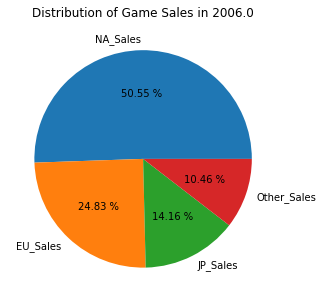

In [22]:
year=float(input("Enter the year: "))
x=all_data.groupby('Year').sum()
x=x.drop(columns='Global_Sales')
td=dict(x.loc[year])
plt.figure(figsize=(7,5))
plt.title("Distribution of Game Sales in "+str(year))
plt.pie(td.values(),autopct='%.2f %%',labels=td.keys())
plt.show()

### Most successful publishers in different regions

#### North America

In [23]:
x=all_data.groupby('Publisher').NA_Sales.sum().sort_values(ascending=False)
x.head(20)

Publisher
Nintendo                                  815.75
Electronic Arts                           584.22
Activision                                426.01
Sony Computer Entertainment               265.22
Ubisoft                                   252.81
Take-Two Interactive                      220.47
THQ                                       208.60
Microsoft Game Studios                    155.35
Sega                                      108.78
Atari                                     101.23
Konami Digital Entertainment               88.91
Capcom                                     78.45
Warner Bros. Interactive Entertainment     75.34
Disney Interactive Studios                 70.44
Namco Bandai Games                         69.38
Square Enix                                48.59
LucasArts                                  48.43
Eidos Interactive                          47.85
Midway Games                               45.10
Acclaim Entertainment                      42.75
Name: NA_S

#### Europe

In [24]:
x=all_data.groupby('Publisher').EU_Sales.sum().sort_values(ascending=False)
x.head(20)

Publisher
Nintendo                                  418.30
Electronic Arts                           367.38
Activision                                213.72
Sony Computer Entertainment               187.55
Ubisoft                                   163.03
Take-Two Interactive                      117.95
THQ                                        94.60
Sega                                       81.41
Konami Digital Entertainment               68.62
Microsoft Game Studios                     68.61
Warner Bros. Interactive Entertainment     48.83
Namco Bandai Games                         42.61
Capcom                                     39.16
Eidos Interactive                          34.85
Disney Interactive Studios                 34.36
Square Enix                                32.57
Bethesda Softworks                         30.48
Codemasters                                28.65
LucasArts                                  26.00
Atari                                      25.80
Name: EU_S

#### Japan

In [25]:
x=all_data.groupby('Publisher').JP_Sales.sum().sort_values(ascending=False)
x.head(20)

Publisher
Nintendo                        454.99
Namco Bandai Games              126.84
Konami Digital Entertainment     90.93
Sony Computer Entertainment      74.10
Capcom                           67.38
Sega                             56.19
Square Enix                      49.79
SquareSoft                       40.13
Enix Corporation                 32.40
Tecmo Koei                       29.21
Hudson Soft                      19.21
Banpresto                        16.44
Electronic Arts                  13.98
Level 5                          11.65
Atari                            10.70
ASCII Entertainment               9.40
Virgin Interactive                8.94
Ubisoft                           7.33
Atlus                             6.73
Activision                        6.54
Name: JP_Sales, dtype: float64